In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [2]:
df=sns.load_dataset('tips')

In [3]:
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
df.isnull()

total_bill    tip    sex  smoker    day   time   size
0         False  False  False   False  False  False  False
1         False  False  False   False  False  False  False
2         False  False  False   False  False  False  False
3         False  False  False   False  False  False  False
4         False  False  False   False  False  False  False
..          ...    ...    ...     ...    ...    ...    ...
239       False  False  False   False  False  False  False
240       False  False  False   False  False  False  False
241       False  False  False   False  False  False  False
242       False  False  False   False  False  False  False
243       False  False  False   False  False  False  False

[244 rows x 7 columns]

In [7]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['sex']=lb.fit_transform(df['sex'])

In [8]:
df

total_bill   tip  sex smoker   day    time  size
0         16.99  1.01    0     No   Sun  Dinner     2
1         10.34  1.66    1     No   Sun  Dinner     3
2         21.01  3.50    1     No   Sun  Dinner     3
3         23.68  3.31    1     No   Sun  Dinner     2
4         24.59  3.61    0     No   Sun  Dinner     4
..          ...   ...  ...    ...   ...     ...   ...
239       29.03  5.92    1     No   Sat  Dinner     3
240       27.18  2.00    0    Yes   Sat  Dinner     2
241       22.67  2.00    1    Yes   Sat  Dinner     2
242       17.82  1.75    1     No   Sat  Dinner     2
243       18.78  3.00    0     No  Thur  Dinner     2

[244 rows x 7 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    int64   
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(3), float64(2), int64(2)
memory usage: 8.9 KB


In [10]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['smoker']=lb.fit_transform(df['smoker'])

In [11]:
df['day']=lb.fit_transform(df['day'])
df['time']=lb.fit_transform(df['time'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int64  
 3   smoker      244 non-null    int64  
 4   day         244 non-null    int64  
 5   time        244 non-null    int64  
 6   size        244 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 13.5 KB


In [13]:
df.corr()

total_bill       tip       sex    smoker       day      time  \
total_bill    1.000000  0.675734  0.144877  0.085721 -0.043550 -0.183118   
tip           0.675734  1.000000  0.088862  0.005929 -0.011548 -0.121629   
sex           0.144877  0.088862  1.000000  0.002816 -0.078292 -0.205231   
smoker        0.085721  0.005929  0.002816  1.000000 -0.282721 -0.054921   
day          -0.043550 -0.011548 -0.078292 -0.282721  1.000000  0.638019   
time         -0.183118 -0.121629 -0.205231 -0.054921  0.638019  1.000000   
size          0.598315  0.489299  0.086195 -0.133178  0.069510 -0.103411   

                size  
total_bill  0.598315  
tip         0.489299  
sex         0.086195  
smoker     -0.133178  
day         0.069510  
time       -0.103411  
size        1.000000

In [14]:
import matplotlib.pyplot as plt

In [15]:
#heatmap is used for finding correlation(light color indicates weak relation, dark color indicates strong relation
sns.heatmap(np.abs(df.corr()),cmap='Purples')
plt.show()

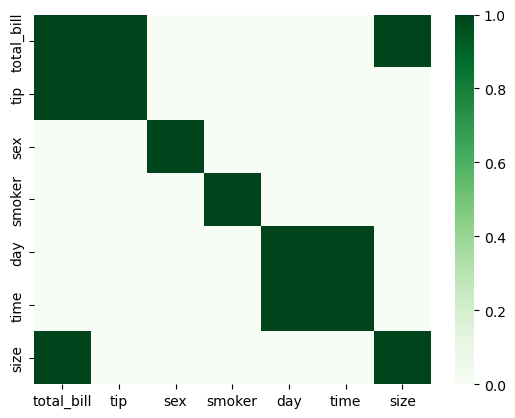

In [16]:
sns.heatmap(np.abs(df.corr())>0.5,cmap='Greens')
plt.show()

In [17]:
df.describe()

total_bill         tip         sex      smoker         day        time  \
count  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000   
mean    19.785943    2.998279    0.643443    0.381148    1.741803    0.278689   
std      8.902412    1.383638    0.479967    0.486667    0.926815    0.449276   
min      3.070000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%     13.347500    2.000000    0.000000    0.000000    1.000000    0.000000   
50%     17.795000    2.900000    1.000000    0.000000    2.000000    0.000000   
75%     24.127500    3.562500    1.000000    1.000000    3.000000    1.000000   
max     50.810000   10.000000    1.000000    1.000000    3.000000    1.000000   

             size  
count  244.000000  
mean     2.569672  
std      0.951100  
min      1.000000  
25%      2.000000  
50%      2.000000  
75%      3.000000  
max      6.000000

In [18]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [19]:
scale_array=std_scaler.fit_transform(df)

In [20]:
scale_array

array([[-3.14711305e-01, -1.43994695e+00, -1.34335316e+00, ...,
         2.79157595e-01, -6.21581561e-01, -6.00192629e-01],
       [-1.06323531e+00, -9.69205340e-01,  7.44405889e-01, ...,
         2.79157595e-01, -6.21581561e-01,  4.53382921e-01],
       [ 1.37779900e-01,  3.63355539e-01,  7.44405889e-01, ...,
         2.79157595e-01, -6.21581561e-01,  4.53382921e-01],
       ...,
       [ 3.24629502e-01, -7.22971264e-01,  7.44405889e-01, ...,
        -8.02024201e-01, -6.21581561e-01, -6.00192629e-01],
       [-2.21286504e-01, -9.04025732e-01,  7.44405889e-01, ...,
        -8.02024201e-01, -6.21581561e-01, -6.00192629e-01],
       [-1.13228903e-01,  1.24660453e-03, -1.34335316e+00, ...,
         1.36033939e+00, -6.21581561e-01, -6.00192629e-01]])

In [21]:
scale_array.shape

(244, 7)

In [22]:
scale_array.size

1708

In [23]:
#to obtain standradized data
scale_df=pd.DataFrame(scale_array,columns=df.columns)
scale_df

total_bill       tip       sex    smoker       day      time      size
0     -0.314711 -1.439947 -1.343353 -0.784789  0.279158 -0.621582 -0.600193
1     -1.063235 -0.969205  0.744406 -0.784789  0.279158 -0.621582  0.453383
2      0.137780  0.363356  0.744406 -0.784789  0.279158 -0.621582  0.453383
3      0.438315  0.225754  0.744406 -0.784789  0.279158 -0.621582 -0.600193
4      0.540745  0.443020 -1.343353 -0.784789  0.279158 -0.621582  1.506958
..          ...       ...       ...       ...       ...       ...       ...
239    1.040511  2.115963  0.744406 -0.784789 -0.802024 -0.621582  0.453383
240    0.832275 -0.722971 -1.343353  1.274228 -0.802024 -0.621582 -0.600193
241    0.324630 -0.722971  0.744406  1.274228 -0.802024 -0.621582 -0.600193
242   -0.221287 -0.904026  0.744406 -0.784789 -0.802024 -0.621582 -0.600193
243   -0.113229  0.001247 -1.343353 -0.784789  1.360339 -0.621582 -0.600193

[244 rows x 7 columns]

In [24]:
scale_df.head(3)

total_bill       tip       sex    smoker       day      time      size
0   -0.314711 -1.439947 -1.343353 -0.784789  0.279158 -0.621582 -0.600193
1   -1.063235 -0.969205  0.744406 -0.784789  0.279158 -0.621582  0.453383
2    0.137780  0.363356  0.744406 -0.784789  0.279158 -0.621582  0.453383

In [25]:
scale_df.describe()

total_bill           tip           sex        smoker           day  \
count  2.440000e+02  2.440000e+02  2.440000e+02  2.440000e+02  2.440000e+02   
mean  -7.871663e-17  2.839259e-16 -2.912060e-17  8.736181e-17 -1.456030e-16   
std    1.002056e+00  1.002056e+00  1.002056e+00  1.002056e+00  1.002056e+00   
min   -1.881547e+00 -1.447189e+00 -1.343353e+00 -7.847892e-01 -1.883206e+00   
25%   -7.247111e-01 -7.229713e-01 -1.343353e+00 -7.847892e-01 -8.020242e-01   
50%   -2.241005e-01 -7.117518e-02  7.444059e-01 -7.847892e-01  2.791576e-01   
75%    4.886857e-01  4.086192e-01  7.444059e-01  1.274228e+00  1.360339e+00   
max    3.492068e+00  5.070772e+00  7.444059e-01  1.274228e+00  1.360339e+00   

             time          size  
count  244.000000  2.440000e+02  
mean     0.000000 -5.824121e-17  
std      1.002056  1.002056e+00  
min     -0.621582 -1.653768e+00  
25%     -0.621582 -6.001926e-01  
50%     -0.621582 -6.001926e-01  
75%      1.608799  4.533829e-01  
max      1.608799  3.614110e+00

In [54]:
import numpy as np
#to find the missisng values after scaling
np.round(scale_df.describe(),3)

total_bill      tip      sex   smoker      day     time     size
count     244.000  244.000  244.000  244.000  244.000  244.000  244.000
mean       -0.000    0.000   -0.000    0.000   -0.000    0.000   -0.000
std         1.002    1.002    1.002    1.002    1.002    1.002    1.002
min        -1.882   -1.447   -1.343   -0.785   -1.883   -0.622   -1.654
25%        -0.725   -0.723   -1.343   -0.785   -0.802   -0.622   -0.600
50%        -0.224   -0.071    0.744   -0.785    0.279   -0.622   -0.600
75%         0.489    0.409    0.744    1.274    1.360    1.609    0.453
max         3.492    5.071    0.744    1.274    1.360    1.609    3.614

In [64]:
#uploading minmax library
from sklearn.preprocessing import MinMaxScaler
mx_scaler=MinMaxScaler()

In [60]:
type(mx_array)

numpy.ndarray

In [62]:
mx_array

array([[0.29157939, 0.00111111, 0.        , ..., 0.66666667, 0.        ,
        0.2       ],
       [0.1522832 , 0.07333333, 1.        , ..., 0.66666667, 0.        ,
        0.4       ],
       [0.3757855 , 0.27777778, 1.        , ..., 0.66666667, 0.        ,
        0.4       ],
       ...,
       [0.41055718, 0.11111111, 1.        , ..., 0.33333333, 0.        ,
        0.2       ],
       [0.30896523, 0.08333333, 1.        , ..., 0.33333333, 0.        ,
        0.2       ],
       [0.32907415, 0.22222222, 0.        , ..., 1.        , 0.        ,
        0.2       ]])

In [82]:
#to convert array into dataframe
mx_df=pd.DataFrame(mx_array,columns=df.columns)
mx_df

total_bill       tip  sex  smoker       day  time  size
0      0.291579  0.001111  0.0     0.0  0.666667   0.0   0.2
1      0.152283  0.073333  1.0     0.0  0.666667   0.0   0.4
2      0.375786  0.277778  1.0     0.0  0.666667   0.0   0.4
3      0.431713  0.256667  1.0     0.0  0.666667   0.0   0.2
4      0.450775  0.290000  0.0     0.0  0.666667   0.0   0.6
..          ...       ...  ...     ...       ...   ...   ...
239    0.543779  0.546667  1.0     0.0  0.333333   0.0   0.4
240    0.505027  0.111111  0.0     1.0  0.333333   0.0   0.2
241    0.410557  0.111111  1.0     1.0  0.333333   0.0   0.2
242    0.308965  0.083333  1.0     0.0  0.333333   0.0   0.2
243    0.329074  0.222222  0.0     0.0  1.000000   0.0   0.2

[244 rows x 7 columns]

In [92]:
type(mx_df)

pandas.core.frame.DataFrame

In [96]:
df.describe()

total_bill         tip         sex      smoker         day        time  \
count  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000   
mean    19.785943    2.998279    0.643443    0.381148    1.741803    0.278689   
std      8.902412    1.383638    0.479967    0.486667    0.926815    0.449276   
min      3.070000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%     13.347500    2.000000    0.000000    0.000000    1.000000    0.000000   
50%     17.795000    2.900000    1.000000    0.000000    2.000000    0.000000   
75%     24.127500    3.562500    1.000000    1.000000    3.000000    1.000000   
max     50.810000   10.000000    1.000000    1.000000    3.000000    1.000000   

             size  
count  244.000000  
mean     2.569672  
std      0.951100  
min      1.000000  
25%      2.000000  
50%      2.000000  
75%      3.000000  
max      6.000000

In [94]:
mx_df.describe()

total_bill         tip         sex      smoker         day        time  \
count  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000   
mean     0.350145    0.222031    0.643443    0.381148    0.580601    0.278689   
std      0.186477    0.153738    0.479967    0.486667    0.308938    0.449276   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.215281    0.111111    0.000000    0.000000    0.333333    0.000000   
50%      0.308442    0.211111    1.000000    0.000000    0.666667    0.000000   
75%      0.441087    0.284722    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             size  
count  244.000000  
mean     0.313934  
std      0.190220  
min      0.000000  
25%      0.200000  
50%      0.200000  
75%      0.400000  
max      1.000000

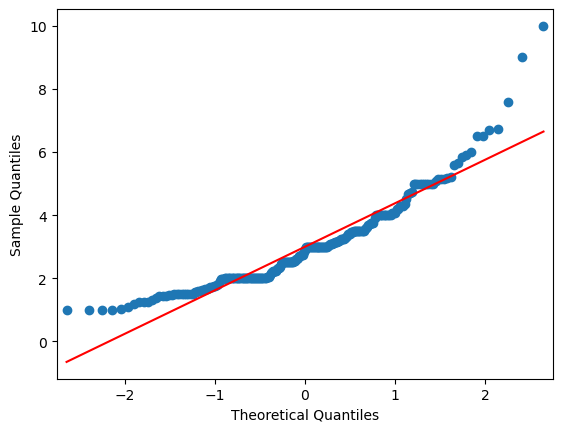

In [100]:
#qq is quantile quantile plot
import statsmodels.api as sm
sm.qqplot(df['tip'],line='s')
plt.show()